In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import cohen_kappa_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [189]:
df = pd.read_csv('../data/parkinsons.data')
print(df.shape,'\n')
df.head()

(195, 24) 



,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


**Feature Engineering**

In [190]:
print("Original shape of data: ", df.shape)
x = df.drop(['status','name'], axis=1)
print("Featues shape:", x.shape)
y = df.status
print("Target shape: ", y.shape)

Original shape of data:  (195, 24)
Featues shape: (195, 22)
Target shape:  (195,)


**Train Test Split**

In [191]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2) 

#### Applying StandardScaler

In [192]:
scaler = StandardScaler()
scaler.fit(x_train)


x_train_scaled = scaler.transform(x_train)
x_test_scaled  = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

#### Balancing Dataset

In [193]:
sampler = RandomOverSampler()
x_train,y_train = sampler.fit_resample(x_train, y_train)

#### Model evaluation function

In [222]:
def evaluate_classification_model(name, y, y_pred):
    print("Evaluate " + name)
    # Visualization of Confusion Matrix
    cf_matrix=confusion_matrix(y, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("Accuracy: ",accuracy_score(y, y_pred))
    kappa_score = cohen_kappa_score(y, y_pred)
    print("Kappa Score:", kappa_score)

#### Logistic Regression

In [223]:
clf = LogisticRegression()

#Train Model
clf.fit(x_train, y_train)

LogisticRegression()

In [224]:
# Prediction on Test and Train Set 
pred_logistic_test = clf.predict(x_test)
pred_logistic_train = clf.predict(x_train)

Evaluate Logistic Regression (TRAIN)


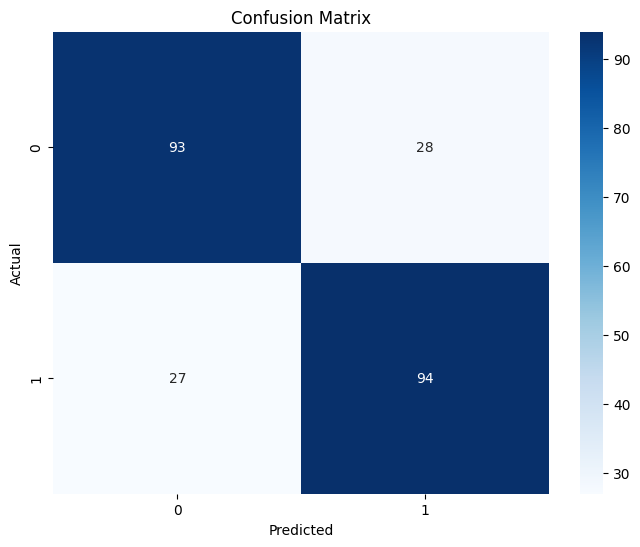

Accuracy:  0.7727272727272727
Kappa Score: 0.5454545454545454


In [225]:
evaluate_classification_model("Logistic Regression (TRAIN)", y_train, pred_logistic_train)

Evaluate Logistic Regression (TEST)


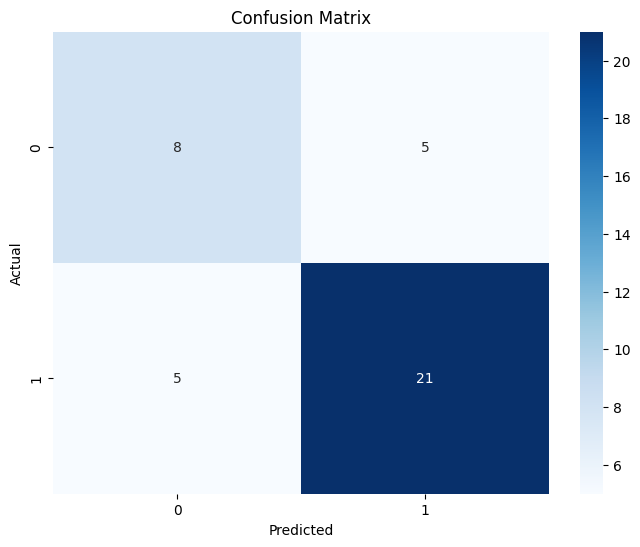

Accuracy:  0.7435897435897436
Kappa Score: 0.423076923076923


In [226]:
evaluate_classification_model("Logistic Regression (TEST)", y_test, pred_logistic_test)

**Decision Tree**

In [227]:
dt = DecisionTreeClassifier()

# Train model 
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [228]:
    kappa_score = cohen_kappa_score(y_test, pred_dt_test)

In [229]:
pred_dt_test = dt.predict(x_test)
pred_dt_train = dt.predict(x_train)

In [230]:
#evaluate_classification_model("Logistic Regression (TRAIN)", y_train, pred_logistic_train)

Evaluate DecisionTreeClassifier(TRAIN)


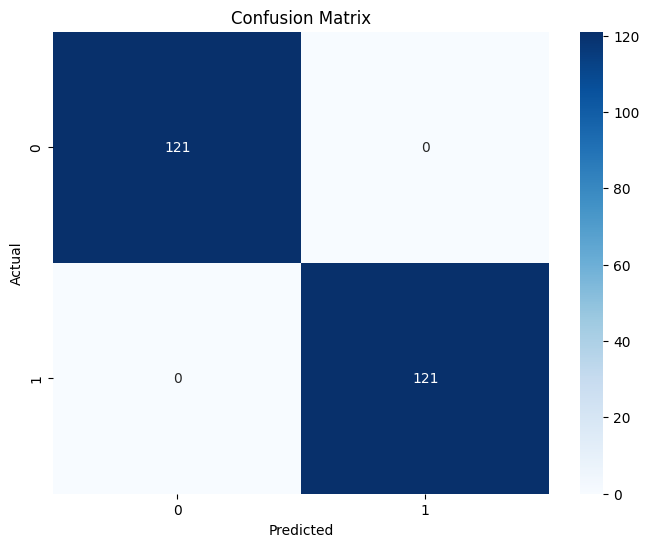

Accuracy:  1.0
Kappa Score: 1.0


In [231]:
evaluate_classification_model("DecisionTreeClassifier(TRAIN)", y_train, pred_dt_train)

Evaluate DecisionTreeClassifier(TEST)


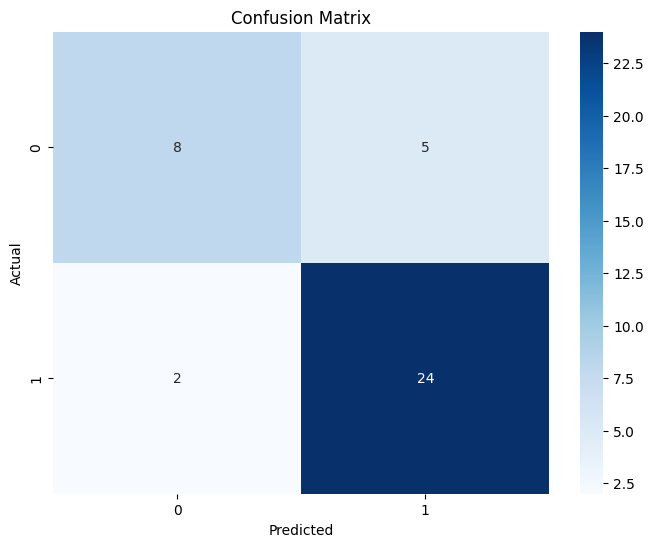

Accuracy:  0.8205128205128205
Kappa Score: 0.5714285714285714


In [232]:
evaluate_classification_model("DecisionTreeClassifier(TEST)", y_test, pred_dt_test)

**Random Forest**

In [235]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [236]:
train_pred_rf = rf.predict(x_train)
pred_rf = rf.predict(x_test)

Evaluate RandomForestClassifier(TRAIN)


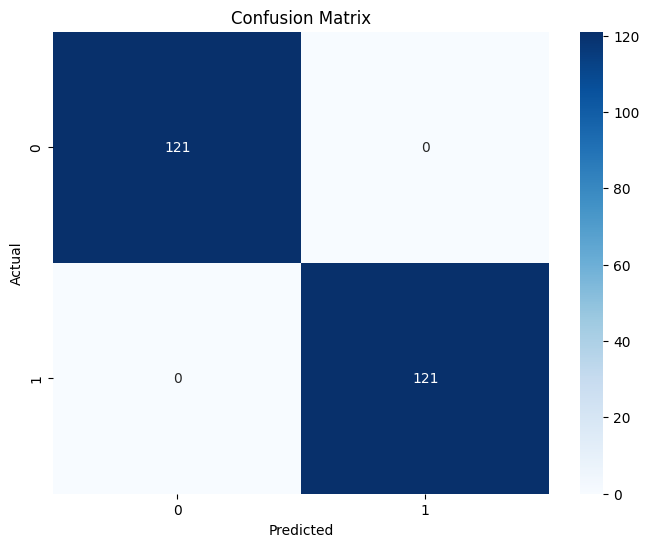

Accuracy:  1.0
Kappa Score: 1.0


In [237]:
evaluate_classification_model("RandomForestClassifier(TRAIN)", y_train, train_pred_rf)

Evaluate RandomForestClassifier(TEST)


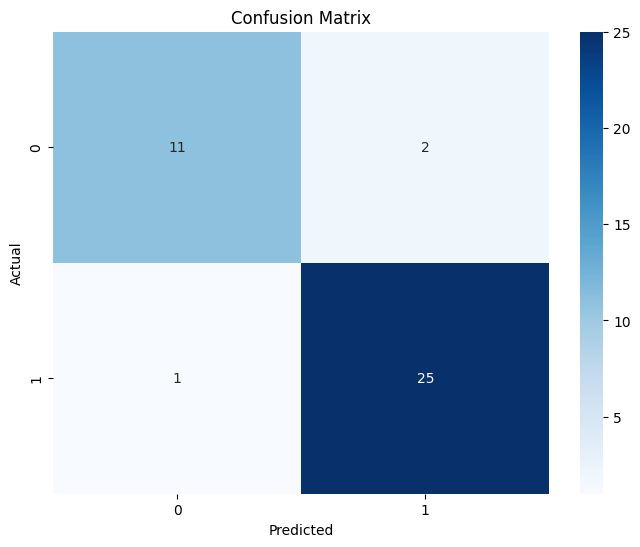

Accuracy:  0.9230769230769231
Kappa Score: 0.8235294117647058


In [238]:
evaluate_classification_model("RandomForestClassifier(TEST)", y_test, pred_rf)

**Gradient Boosting**

In [239]:
gb = GradientBoostingClassifier()

# Training model
gb.fit(x_train, y_train)

# Prediction on test and train set
gb_pred_train = gb.predict(x_train)
gb_pred = gb.predict(x_test)

Evaluate GradientBoostingClassifier(TRAIN)


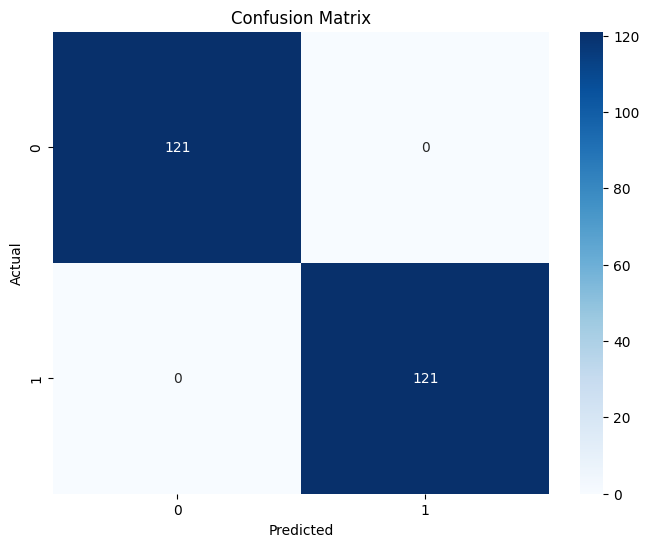

Accuracy:  1.0
Kappa Score: 1.0


In [240]:
evaluate_classification_model("GradientBoostingClassifier(TRAIN)", y_train, gb_pred_train)

Evaluate GradientBoostingClassifier(TEST)


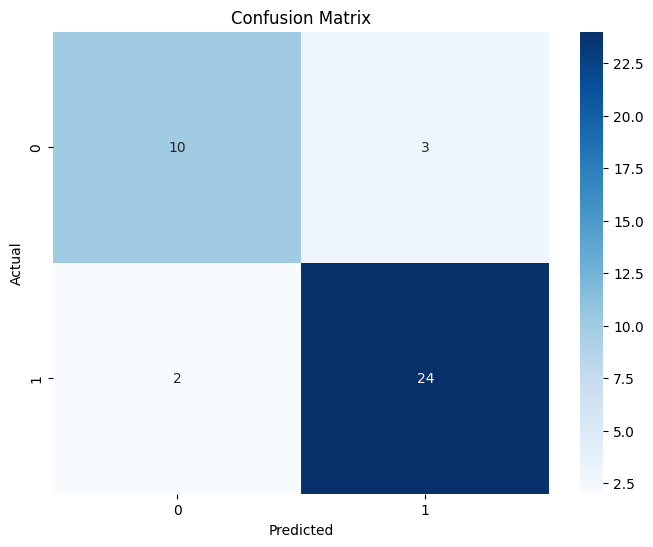

Accuracy:  0.8717948717948718
Kappa Score: 0.7058823529411764


In [241]:
evaluate_classification_model("GradientBoostingClassifier(TEST)", y_test, gb_pred)

**XG Boost**

In [242]:
xg = xgb.XGBClassifier()

# Training model
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [243]:
# prediction on train and test set
xg_pred_train = xg.predict(x_train)
xg_pred = xg.predict(x_test)

Evaluate xgb.XGBClassifier(TRAIN)


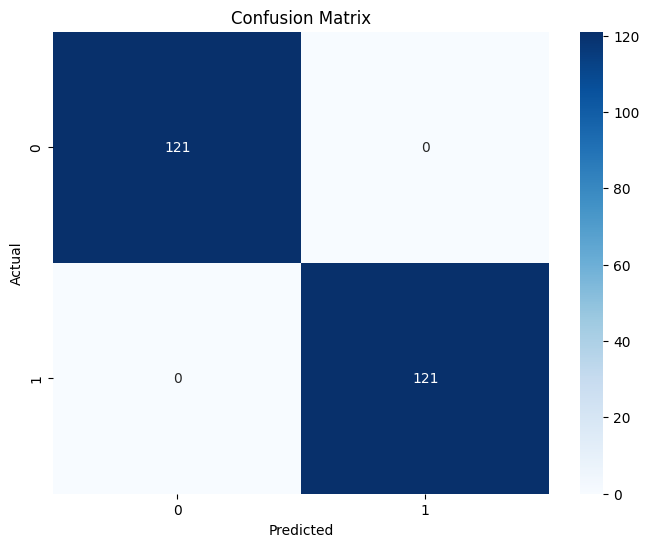

Accuracy:  1.0
Kappa Score: 1.0


In [244]:
evaluate_classification_model("xgb.XGBClassifier(TRAIN)", y_train, xg_pred_train)

Evaluate xgb.XGBClassifier(TEST)


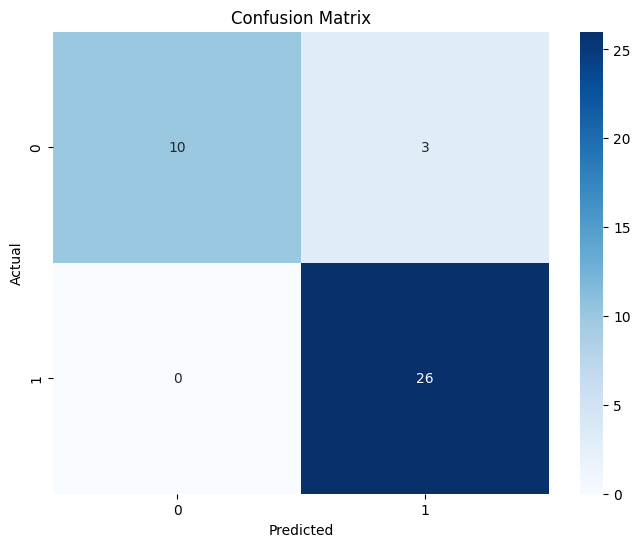

Accuracy:  0.9230769230769231
Kappa Score: 0.8163265306122449


In [245]:
evaluate_classification_model("xgb.XGBClassifier(TEST)", y_test, xg_pred)

**Conclusion : Random Forest and XG-Boost both are over 88% accurate in predicting disease with a kappa score of over 80% score too**

In [217]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: 0.9505102040816326
